In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mlflow
import os

%matplotlib inline


In [9]:
tracking_uri = 'file:///mnt/fs4/eliwang/physopt/mlruns'
client = mlflow.tracking.MlflowClient(tracking_uri=tracking_uri)

In [12]:
SCENARIOS = [
    'Collide',
    'Contain',
    'Dominoes',
    'Drape',
    'Drop',
    'Link',
    'Roll',
    'Support',
]
PROTOCOL_MAPPING = {
    'input': 'observed',
    'simulated': 'observed+sim.',
    'observed': 'full movie',
}



def build_filter_string(filter_args):
    filter_string = []
    for k,v in filter_args.items():
        filter_string.append(f'{k}="{v}"')
    filter_string = ' and '.join(filter_string)
    print(filter_string)
    return filter_string

def build_df(filter_args):
    experiment = client.get_experiment_by_name('physion-frozen')
    if isinstance(filter_args, int):
        filter_string = f'params.extraction_LOAD_STEP="{filter_args}" and params.phase="readout"'
    else:
        filter_string = build_filter_string(filter_args)
#     filter_string = f'params.extraction_LOAD_STEP="{load_step}" and params.phase="readout" and params.restore_run_id="{restore_id}"'
    runs = client.search_runs([experiment.experiment_id], filter_string)
    run_ids = [run.info.run_id for run in runs]
    #assert len(run_ids)==8, run_ids
    df = pd.DataFrame(columns=['scenario','protocol', 'value', 'mode'])
    for run_id in run_ids:
        run = client.get_run(run_id)
        params = run.data.params
        metrics = run.data.metrics
        for k,v in metrics.items():
            mode, _, protocol = k.split('_')
            df = df.append({
                'scenario': params['readout_name'],
                'protocol': PROTOCOL_MAPPING[protocol],
                'value': v,
                'mode': mode,
            }, ignore_index=True)
    return df

def add_boxplot(df, x, y, category):
    sns.boxplot(x=x, y=y, data=df, hue=category, fliersize=0)

def add_pointplot(df, x, y,  category, **kwargs):
    sns.pointplot(x=x, y=y, data=df, hue=category, join=False, **kwargs)
    
def add_stripplot(df, x, y, category, size=8, **kwargs):
    sns.stripplot(x=x, y=y, data=df, hue=category, size=8, **kwargs)

params.extraction_LOAD_STEP="0" and params.phase="readout" and params.pretraining_MODEL_NAME="pCLIP_LSTM" and params.seed="1"
params.extraction_LOAD_STEP="0" and params.phase="readout" and params.pretraining_MODEL_NAME="pR3M_LSTM" and params.seed="1"
params.extraction_LOAD_STEP="0" and params.phase="readout" and params.pretraining_MODEL_NAME="pResNet50_LSTM" and params.seed="1"
0.5933333333333334


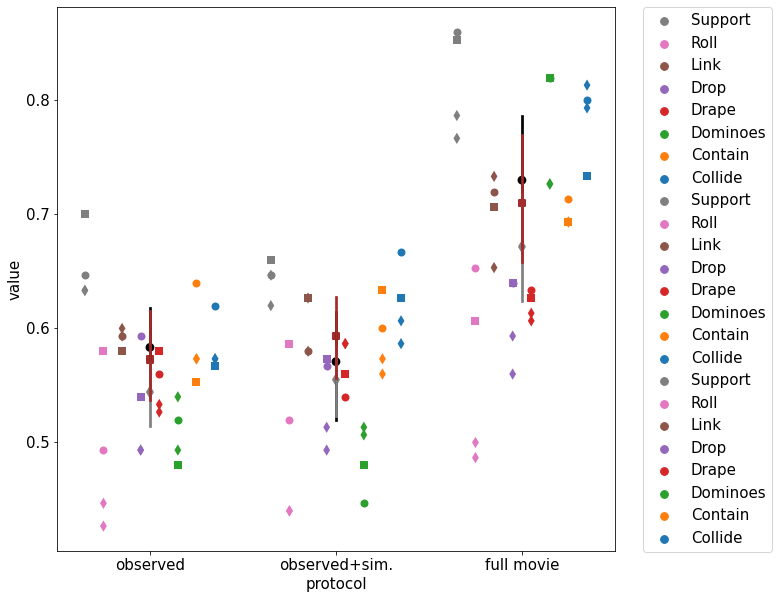

In [50]:
palette = {k:f'C{i}' for i,k in enumerate(SCENARIOS)}
filter_args = {
    'params.extraction_LOAD_STEP': 0,
    'params.phase': 'readout',
    'params.pretraining_MODEL_NAME': 'pCLIP_LSTM',
    'params.seed': 1,
}
df = build_df(filter_args)
test_df = df[df['mode'] == 'test']
order = [PROTOCOL_MAPPING[p] for p in ['input', 'simulated', 'observed']]
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,10))
add_pointplot(test_df, 'protocol', 'value', None, order=order, color='black')
add_stripplot(test_df, 'protocol', 'value', 'scenario', order=order, palette=palette, dodge=0.1, jitter=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

filter_args = {
    'params.extraction_LOAD_STEP': 0,
    'params.phase': 'readout',
    'params.pretraining_MODEL_NAME': 'pR3M_LSTM',
    'params.seed': 1,
}
df = build_df(filter_args)
test_df = df[df['mode'] == 'test']
order = [PROTOCOL_MAPPING[p] for p in ['input', 'simulated', 'observed']]
plt.rcParams.update({'font.size': 15})
# plt.figure(figsize=(10,10))
add_pointplot(test_df, 'protocol', 'value', None, order=order, color='grey', markers='d')
add_stripplot(test_df, 'protocol', 'value', 'scenario', order=order, marker='d', palette=palette, dodge=0.1, jitter=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

filter_args = {
    'params.extraction_LOAD_STEP': 0,
    'params.phase': 'readout',
    'params.pretraining_MODEL_NAME': 'pResNet50_LSTM',
    'params.seed': 1,
}
df = build_df(filter_args)
test_df = df[df['mode'] == 'test']
order = [PROTOCOL_MAPPING[p] for p in ['input', 'simulated', 'observed']]
plt.rcParams.update({'font.size': 15})
# plt.figure(figsize=(10,10))
add_pointplot(test_df, 'protocol', 'value', None, order=order, color='brown', markers='s')
add_stripplot(test_df, 'protocol', 'value', 'scenario', order=order, marker='s', palette=palette, dodge=0.1, jitter=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


print(test_df[test_df['protocol']=='observed+sim.']['value'].mean())

params.extraction_LOAD_STEP="0" and params.phase="readout" and params.pretraining_MODEL_NAME="pR3M_LSTM" and params.seed="1"
params.extraction_LOAD_STEP="0" and params.phase="readout" and params.pretraining_MODEL_NAME="pR3M_LSTM" and params.seed="0"
0.54


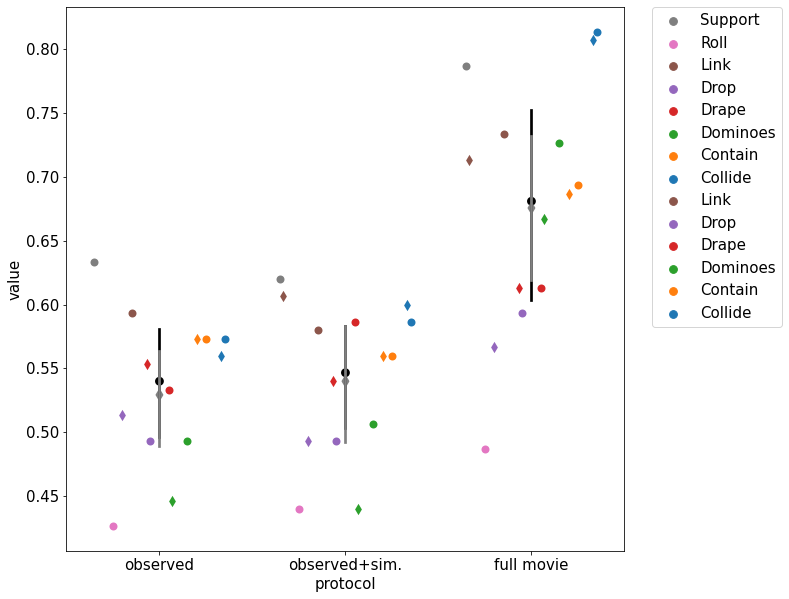

In [36]:
palette = {k:f'C{i}' for i,k in enumerate(SCENARIOS)}
filter_args = {
    'params.extraction_LOAD_STEP': 0,
    'params.phase': 'readout',
    'params.pretraining_MODEL_NAME': 'pR3M_LSTM',
    'params.seed': 1,
}
df = build_df(filter_args)
test_df = df[df['mode'] == 'test']
order = [PROTOCOL_MAPPING[p] for p in ['input', 'simulated', 'observed']]
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,10))
add_pointplot(test_df, 'protocol', 'value', None, order=order, color='black')
add_stripplot(test_df, 'protocol', 'value', 'scenario', order=order, palette=palette, dodge=0.1, jitter=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

filter_args = {
    'params.extraction_LOAD_STEP': 0,
    'params.phase': 'readout',
    'params.pretraining_MODEL_NAME': 'pR3M_LSTM',
    'params.seed': 0,
}
df = build_df(filter_args)
test_df = df[df['mode'] == 'test']
order = [PROTOCOL_MAPPING[p] for p in ['input', 'simulated', 'observed']]
plt.rcParams.update({'font.size': 15})
# plt.figure(figsize=(10,10))
add_pointplot(test_df, 'protocol', 'value', None, order=order, color='grey', markers='d')
add_stripplot(test_df, 'protocol', 'value', 'scenario', order=order, marker='d', palette=palette, dodge=0.1, jitter=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

print(test_df[test_df['protocol']=='observed+sim.']['value'].mean())

params.extraction_LOAD_STEP="0" and params.phase="readout" and params.pretraining_MODEL_NAME="pR3M_LSTM" and params.seed="1"
params.extraction_LOAD_STEP="0" and params.phase="readout" and params.pretraining_MODEL_NAME="pR3M_LSTM" and params.seed="2"
params.extraction_LOAD_STEP="0" and params.phase="readout" and params.pretraining_MODEL_NAME="pR3M_LSTM" and params.seed="3"
0.5458333333333334


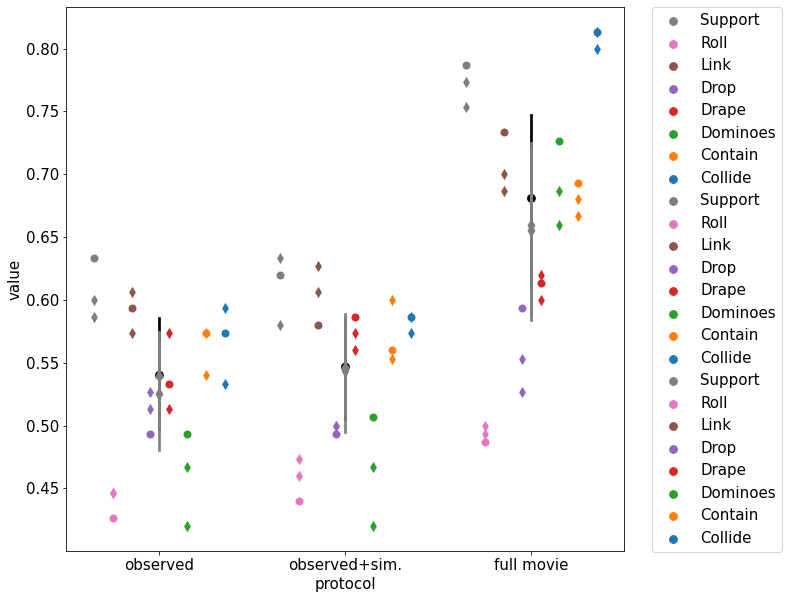

In [41]:
palette = {k:f'C{i}' for i,k in enumerate(SCENARIOS)}
filter_args = {
    'params.extraction_LOAD_STEP': 0,
    'params.phase': 'readout',
    'params.pretraining_MODEL_NAME': 'pR3M_LSTM',
    'params.seed': 1,
}
df = build_df(filter_args)
test_df = df[df['mode'] == 'test']
order = [PROTOCOL_MAPPING[p] for p in ['input', 'simulated', 'observed']]
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,10))
add_pointplot(test_df, 'protocol', 'value', None, order=order, color='black')
add_stripplot(test_df, 'protocol', 'value', 'scenario', order=order, palette=palette, dodge=0.1, jitter=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

filter_args = {
    'params.extraction_LOAD_STEP': 0,
    'params.phase': 'readout',
    'params.pretraining_MODEL_NAME': 'pR3M_LSTM',
    'params.seed': 2,
}
df = build_df(filter_args)
test_df = df[df['mode'] == 'test']
order = [PROTOCOL_MAPPING[p] for p in ['input', 'simulated', 'observed']]
plt.rcParams.update({'font.size': 15})
# plt.figure(figsize=(10,10))
add_pointplot(test_df, 'protocol', 'value', None, order=order, color='grey', markers='d')
add_stripplot(test_df, 'protocol', 'value', 'scenario', order=order, marker='d', palette=palette, dodge=0.1, jitter=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

filter_args = {
    'params.extraction_LOAD_STEP': 0,
    'params.phase': 'readout',
    'params.pretraining_MODEL_NAME': 'pR3M_LSTM',
    'params.seed': 3,
}
df = build_df(filter_args)
test_df = df[df['mode'] == 'test']
order = [PROTOCOL_MAPPING[p] for p in ['input', 'simulated', 'observed']]
plt.rcParams.update({'font.size': 15})
# plt.figure(figsize=(10,10))
add_pointplot(test_df, 'protocol', 'value', None, order=order, color='grey', markers='d')
add_stripplot(test_df, 'protocol', 'value', 'scenario', order=order, marker='d', palette=palette, dodge=0.1, jitter=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

print(test_df[test_df['protocol']=='observed+sim.']['value'].mean())

params.extraction_LOAD_STEP="0" and params.phase="readout" and params.pretraining_MODEL_NAME="pResNet50_LSTM" and params.seed="1"
params.extraction_LOAD_STEP="0" and params.phase="readout" and params.pretraining_MODEL_NAME="pResNet50_LSTM" and params.seed="2"
params.extraction_LOAD_STEP="0" and params.phase="readout" and params.pretraining_MODEL_NAME="pResNet50_LSTM" and params.seed="3"
0.5708333333333333


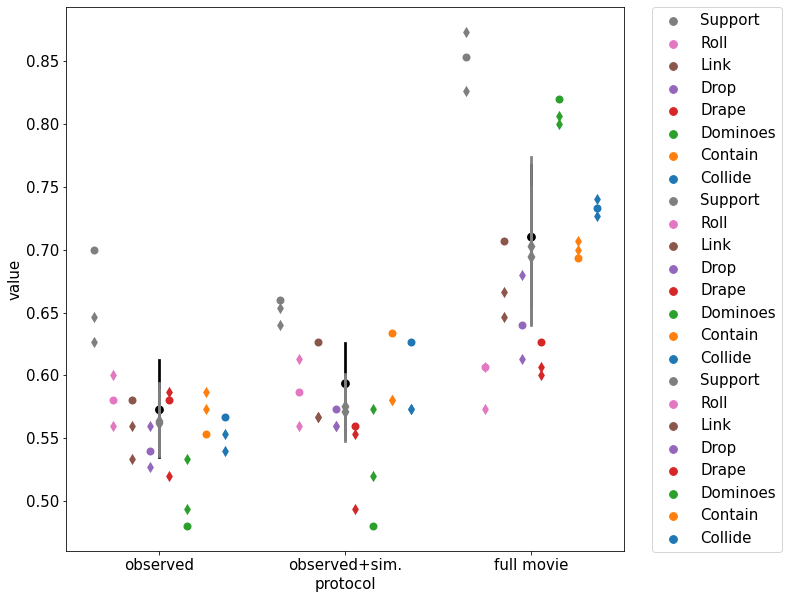

In [40]:
palette = {k:f'C{i}' for i,k in enumerate(SCENARIOS)}
filter_args = {
    'params.extraction_LOAD_STEP': 0,
    'params.phase': 'readout',
    'params.pretraining_MODEL_NAME': 'pResNet50_LSTM',
    'params.seed': 1,
}
df = build_df(filter_args)
test_df = df[df['mode'] == 'test']
order = [PROTOCOL_MAPPING[p] for p in ['input', 'simulated', 'observed']]
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,10))
add_pointplot(test_df, 'protocol', 'value', None, order=order, color='black')
add_stripplot(test_df, 'protocol', 'value', 'scenario', order=order, palette=palette, dodge=0.1, jitter=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

filter_args = {
    'params.extraction_LOAD_STEP': 0,
    'params.phase': 'readout',
    'params.pretraining_MODEL_NAME': 'pResNet50_LSTM',
    'params.seed': 2,
}
df = build_df(filter_args)
test_df = df[df['mode'] == 'test']
order = [PROTOCOL_MAPPING[p] for p in ['input', 'simulated', 'observed']]
plt.rcParams.update({'font.size': 15})
# plt.figure(figsize=(10,10))
add_pointplot(test_df, 'protocol', 'value', None, order=order, color='grey', markers='d')
add_stripplot(test_df, 'protocol', 'value', 'scenario', order=order, marker='d', palette=palette, dodge=0.1, jitter=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

filter_args = {
    'params.extraction_LOAD_STEP': 0,
    'params.phase': 'readout',
    'params.pretraining_MODEL_NAME': 'pResNet50_LSTM',
    'params.seed': 3,
}
df = build_df(filter_args)
test_df = df[df['mode'] == 'test']
order = [PROTOCOL_MAPPING[p] for p in ['input', 'simulated', 'observed']]
plt.rcParams.update({'font.size': 15})
# plt.figure(figsize=(10,10))
add_pointplot(test_df, 'protocol', 'value', None, order=order, color='grey', markers='d')
add_stripplot(test_df, 'protocol', 'value', 'scenario', order=order, marker='d', palette=palette, dodge=0.1, jitter=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


print(test_df[test_df['protocol']=='observed+sim.']['value'].mean())

params.extraction_LOAD_STEP="1000" and params.phase="readout" and params.pretraining_MODEL_NAME="pR3M_LSTM"
params.extraction_LOAD_STEP="1000" and params.phase="readout" and params.pretraining_MODEL_NAME="pResNet50_LSTM"
0.5625


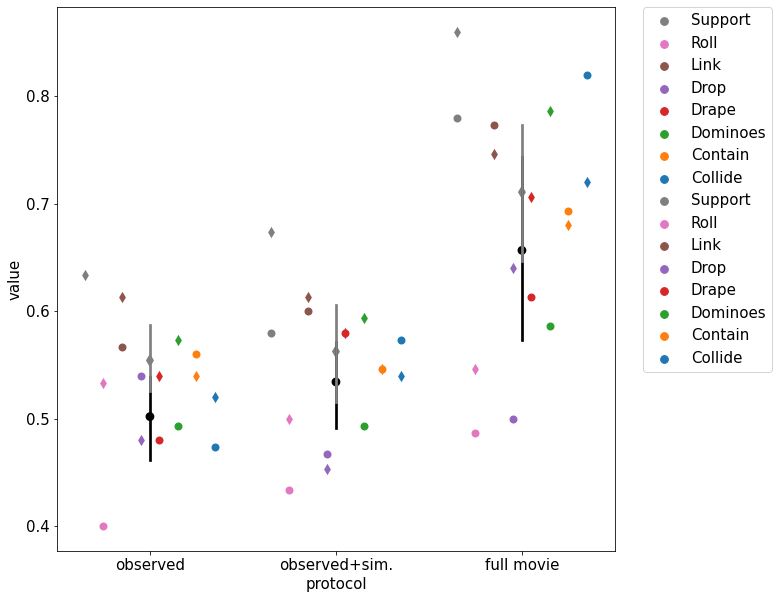

In [30]:
palette = {k:f'C{i}' for i,k in enumerate(SCENARIOS)}
filter_args = {
    'params.extraction_LOAD_STEP': 1000,
    'params.phase': 'readout',
    'params.pretraining_MODEL_NAME': 'pR3M_LSTM',
}
df = build_df(filter_args)
test_df = df[df['mode'] == 'test']
order = [PROTOCOL_MAPPING[p] for p in ['input', 'simulated', 'observed']]
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,10))
add_pointplot(test_df, 'protocol', 'value', None, order=order, color='black')
add_stripplot(test_df, 'protocol', 'value', 'scenario', order=order, palette=palette, dodge=0.1, jitter=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

filter_args = {
    'params.extraction_LOAD_STEP': 1000,
    'params.phase': 'readout',
    'params.pretraining_MODEL_NAME': 'pResNet50_LSTM',
}
df = build_df(filter_args)
test_df = df[df['mode'] == 'test']
order = [PROTOCOL_MAPPING[p] for p in ['input', 'simulated', 'observed']]
plt.rcParams.update({'font.size': 15})
# plt.figure(figsize=(10,10))
add_pointplot(test_df, 'protocol', 'value', None, order=order, color='grey', markers='d')
add_stripplot(test_df, 'protocol', 'value', 'scenario', order=order, marker='d', palette=palette, dodge=0.1, jitter=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

print(test_df[test_df['protocol']=='observed+sim.']['value'].mean())

params.extraction_LOAD_STEP="1000" and params.phase="readout" and params.pretraining_MODEL_NAME="pR3M_MLP"
params.extraction_LOAD_STEP="1000" and params.phase="readout" and params.pretraining_MODEL_NAME="pResNet50_MLP"
0.5841666666666666


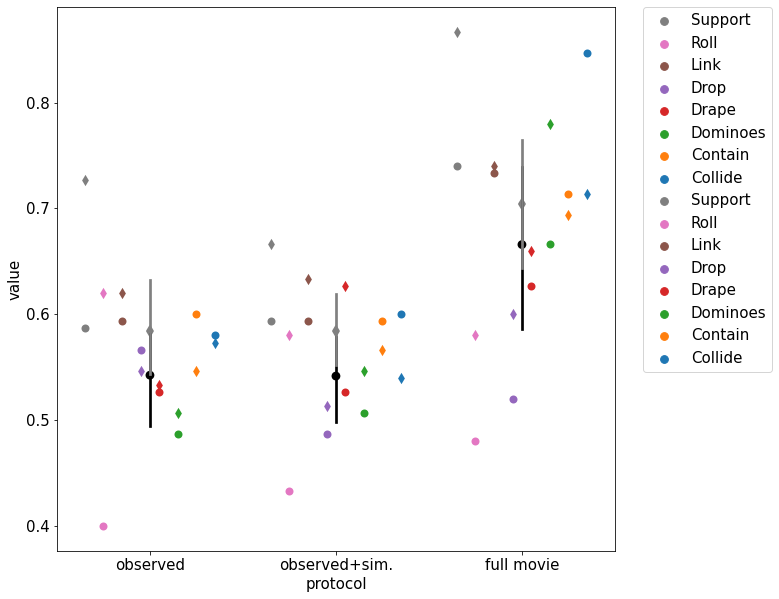

In [42]:
palette = {k:f'C{i}' for i,k in enumerate(SCENARIOS)}
filter_args = {
    'params.extraction_LOAD_STEP': 1000,
    'params.phase': 'readout',
    'params.pretraining_MODEL_NAME': 'pR3M_MLP',
}
df = build_df(filter_args)
test_df = df[df['mode'] == 'test']
order = [PROTOCOL_MAPPING[p] for p in ['input', 'simulated', 'observed']]
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,10))
add_pointplot(test_df, 'protocol', 'value', None, order=order, color='black')
add_stripplot(test_df, 'protocol', 'value', 'scenario', order=order, palette=palette, dodge=0.1, jitter=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

filter_args = {
    'params.extraction_LOAD_STEP': 1000,
    'params.phase': 'readout',
    'params.pretraining_MODEL_NAME': 'pResNet50_MLP',
}
df = build_df(filter_args)
test_df = df[df['mode'] == 'test']
order = [PROTOCOL_MAPPING[p] for p in ['input', 'simulated', 'observed']]
plt.rcParams.update({'font.size': 15})
# plt.figure(figsize=(10,10))
add_pointplot(test_df, 'protocol', 'value', None, order=order, color='grey', markers='d')
add_stripplot(test_df, 'protocol', 'value', 'scenario', order=order, marker='d', palette=palette, dodge=0.1, jitter=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

print(test_df[test_df['protocol']=='observed+sim.']['value'].mean())